# **Importing Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('Set2')

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Dataset Can be downloaded from : https://www.kaggle.com/datasets/kartik2112/fraud-detection

# **Loading Data**

In [2]:
train = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv',index_col='Unnamed: 0')
test = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv',index_col='Unnamed: 0')

In [3]:
train.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0


In [4]:
train.shape

(1296675, 22)

In [5]:
train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [6]:
columns_drop = ["unix_time","merchant","first","street"]
train.drop(columns = columns_drop,inplace= True)
test.drop(columns = columns_drop,inplace= True)

**Droping Certain unuseful columns**


# **EDA**

In [7]:
train.isna().sum().sum(),train.duplicated().sum()

(0, 0)

**No null or duplicate values**

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
cc_num,1296675.0,4.171920e+17,1.308806e+18,6.041621e+10,1.800429e+14,3.521417e+15,4.642255e+15,4.992346e+18
amt,1296675.0,7.035104e+01,1.603160e+02,1.000000e+00,9.650000e+00,4.752000e+01,8.314000e+01,2.894890e+04
zip,1296675.0,4.880067e+04,2.689322e+04,1.257000e+03,2.623700e+04,4.817400e+04,7.204200e+04,9.978300e+04
lat,1296675.0,3.853762e+01,5.075808e+00,2.002710e+01,3.462050e+01,3.935430e+01,4.194040e+01,6.669330e+01
long,1296675.0,-9.022634e+01,1.375908e+01,-1.656723e+02,-9.679800e+01,-8.747690e+01,-8.015800e+01,-6.795030e+01
city_pop,1296675.0,8.882444e+04,3.019564e+05,2.300000e+01,7.430000e+02,2.456000e+03,2.032800e+04,2.906700e+06
merch_lat,1296675.0,3.853734e+01,5.109788e+00,1.902779e+01,3.473357e+01,3.936568e+01,4.195716e+01,6.751027e+01
merch_long,1296675.0,-9.022646e+01,1.377109e+01,-1.666712e+02,-9.689728e+01,-8.743839e+01,-8.023680e+01,-6.695090e+01
is_fraud,1296675.0,5.788652e-03,7.586269e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   category               1296675 non-null  object 
 3   amt                    1296675 non-null  float64
 4   last                   1296675 non-null  object 
 5   gender                 1296675 non-null  object 
 6   city                   1296675 non-null  object 
 7   state                  1296675 non-null  object 
 8   zip                    1296675 non-null  int64  
 9   lat                    1296675 non-null  float64
 10  long                   1296675 non-null  float64
 11  city_pop               1296675 non-null  int64  
 12  job                    1296675 non-null  object 
 13  dob                    1296675 non-null  object 
 14  trans_num              

**There are a lot of categorical features! So we need to encode them**

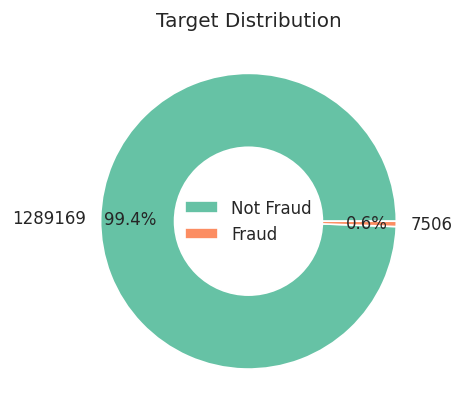

In [10]:
#Target Distribution

donut = train["is_fraud"].value_counts().reset_index()

labels = ["Not Fraud", "Fraud"]
explode = (0, 0)

fig, ax = plt.subplots(dpi=120, figsize=(8, 4))
plt.pie(donut["count"],
        labels=donut["count"],
        autopct="%1.1f%%",
        pctdistance=0.8,
        explode=explode)

centre_circle = plt.Circle((0.0, 0.0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Target Distribution")
plt.legend(labels, loc="center", frameon=False)
plt.show();

**Highly imbalanced classes** Because of this, Oversampling/Undersampling can be used in the model.

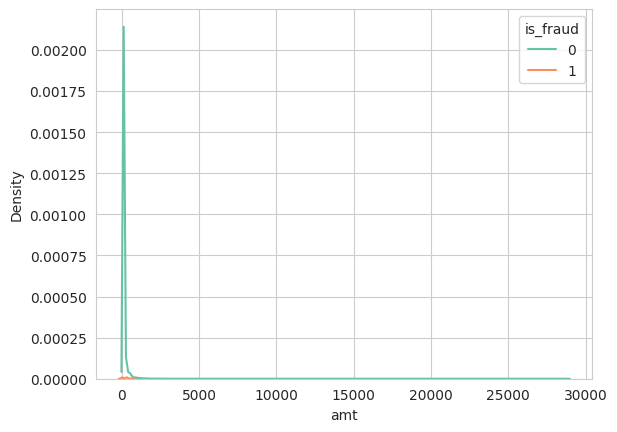

In [11]:
sns.kdeplot(x="amt", hue="is_fraud",data=train);

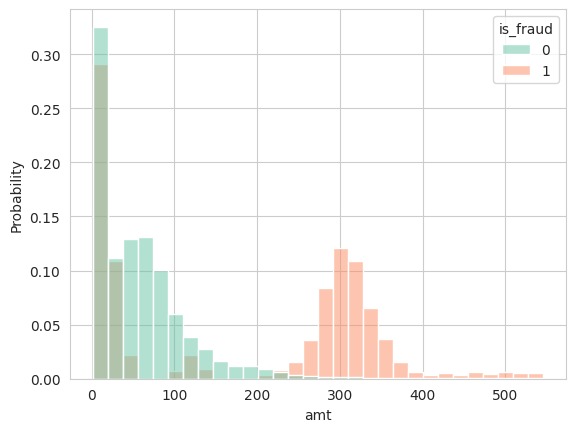

In [12]:
pct99 = train["amt"].quantile(0.99)
sns.histplot(x="amt", hue="is_fraud", bins=30,
             stat="probability", data=train[train["amt"] <= pct99],
             common_norm=False);

**the probability distribution behaves differently for each value of "is_fraud".**

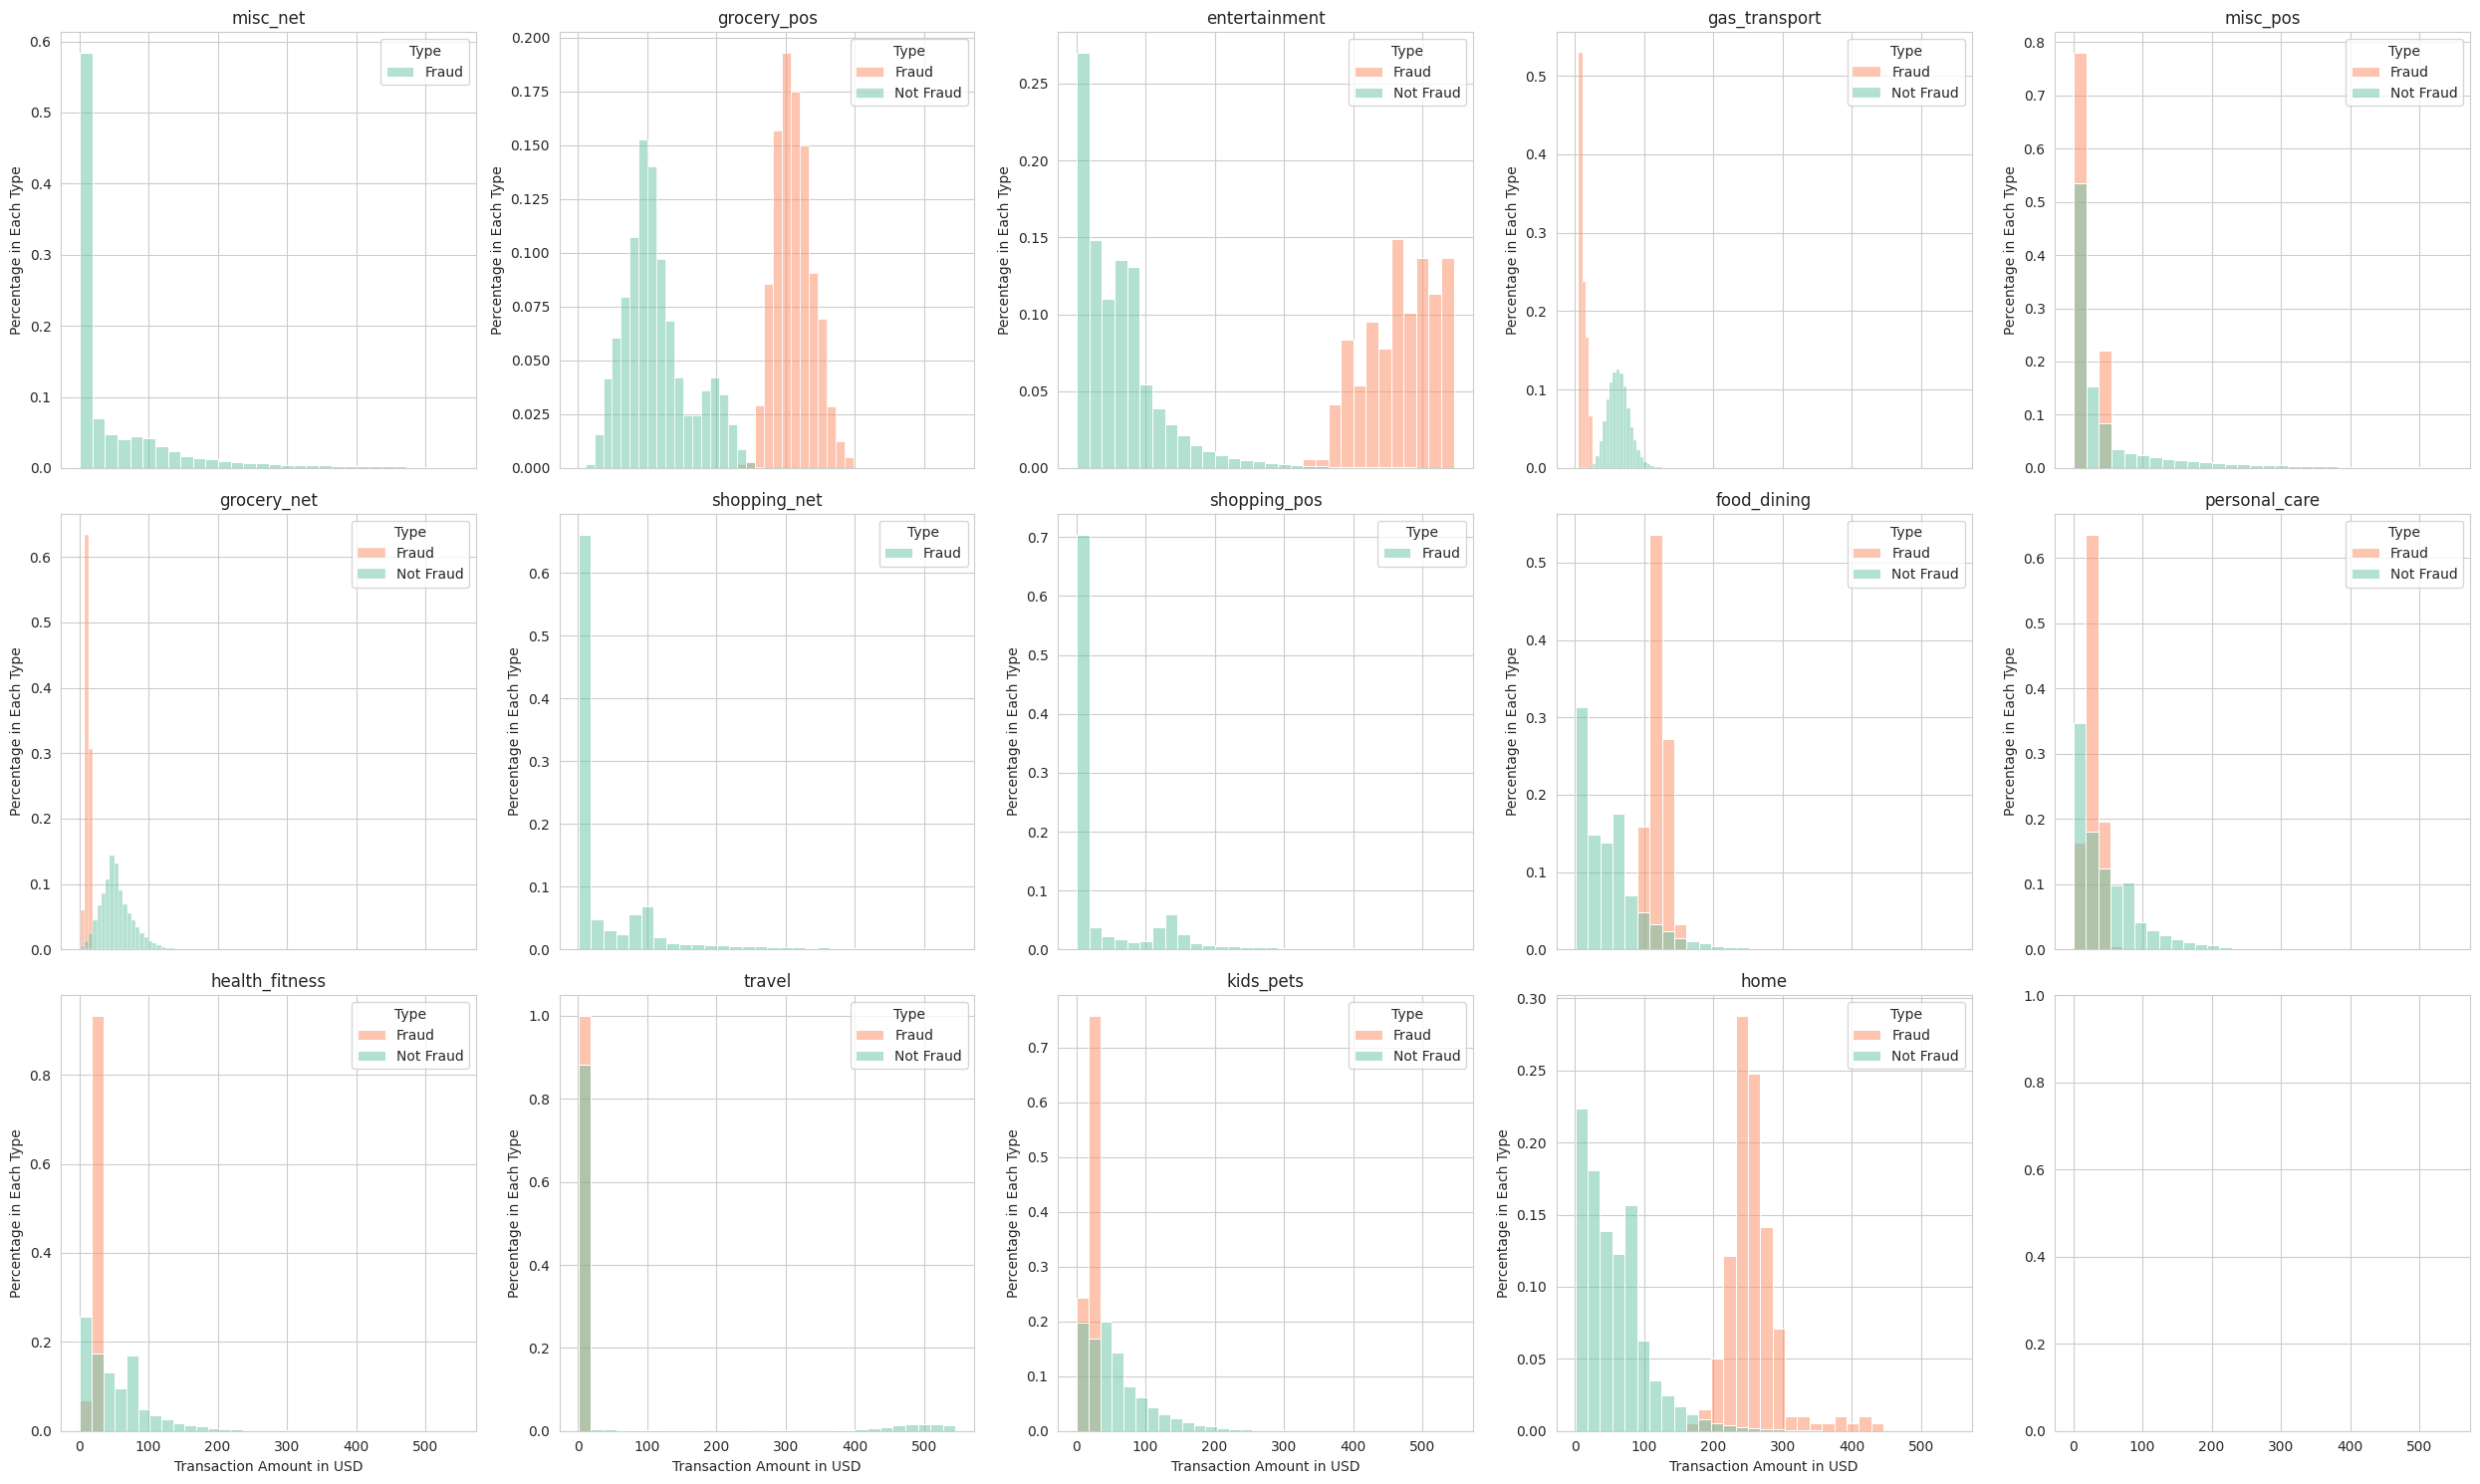

In [14]:
import math
categories = train['category'].unique()

num_plots = len(categories)
num_rows = math.isqrt(num_plots)
num_cols = math.ceil(num_plots / num_rows)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(
    5*num_cols, 5*num_rows), sharex=True)

for ax, category in zip(axes.ravel(),categories):

    data_category = train[train['category'] == category]

    sns.histplot(x='amt', data=data_category[data_category['amt'] <= pct99],
                 hue='is_fraud', stat='probability',
                 common_norm=False, bins=30, ax=ax)

    ax.set_ylabel('Percentage in Each Type')
    ax.set_xlabel('Transaction Amount in USD')
    ax.set_title(f'{category}')
    ax.legend(title='Type', labels=['Fraud', 'Not Fraud'])

plt.tight_layout()
plt.show();

**There are patterns in categories hence we must consider categories for modelling**

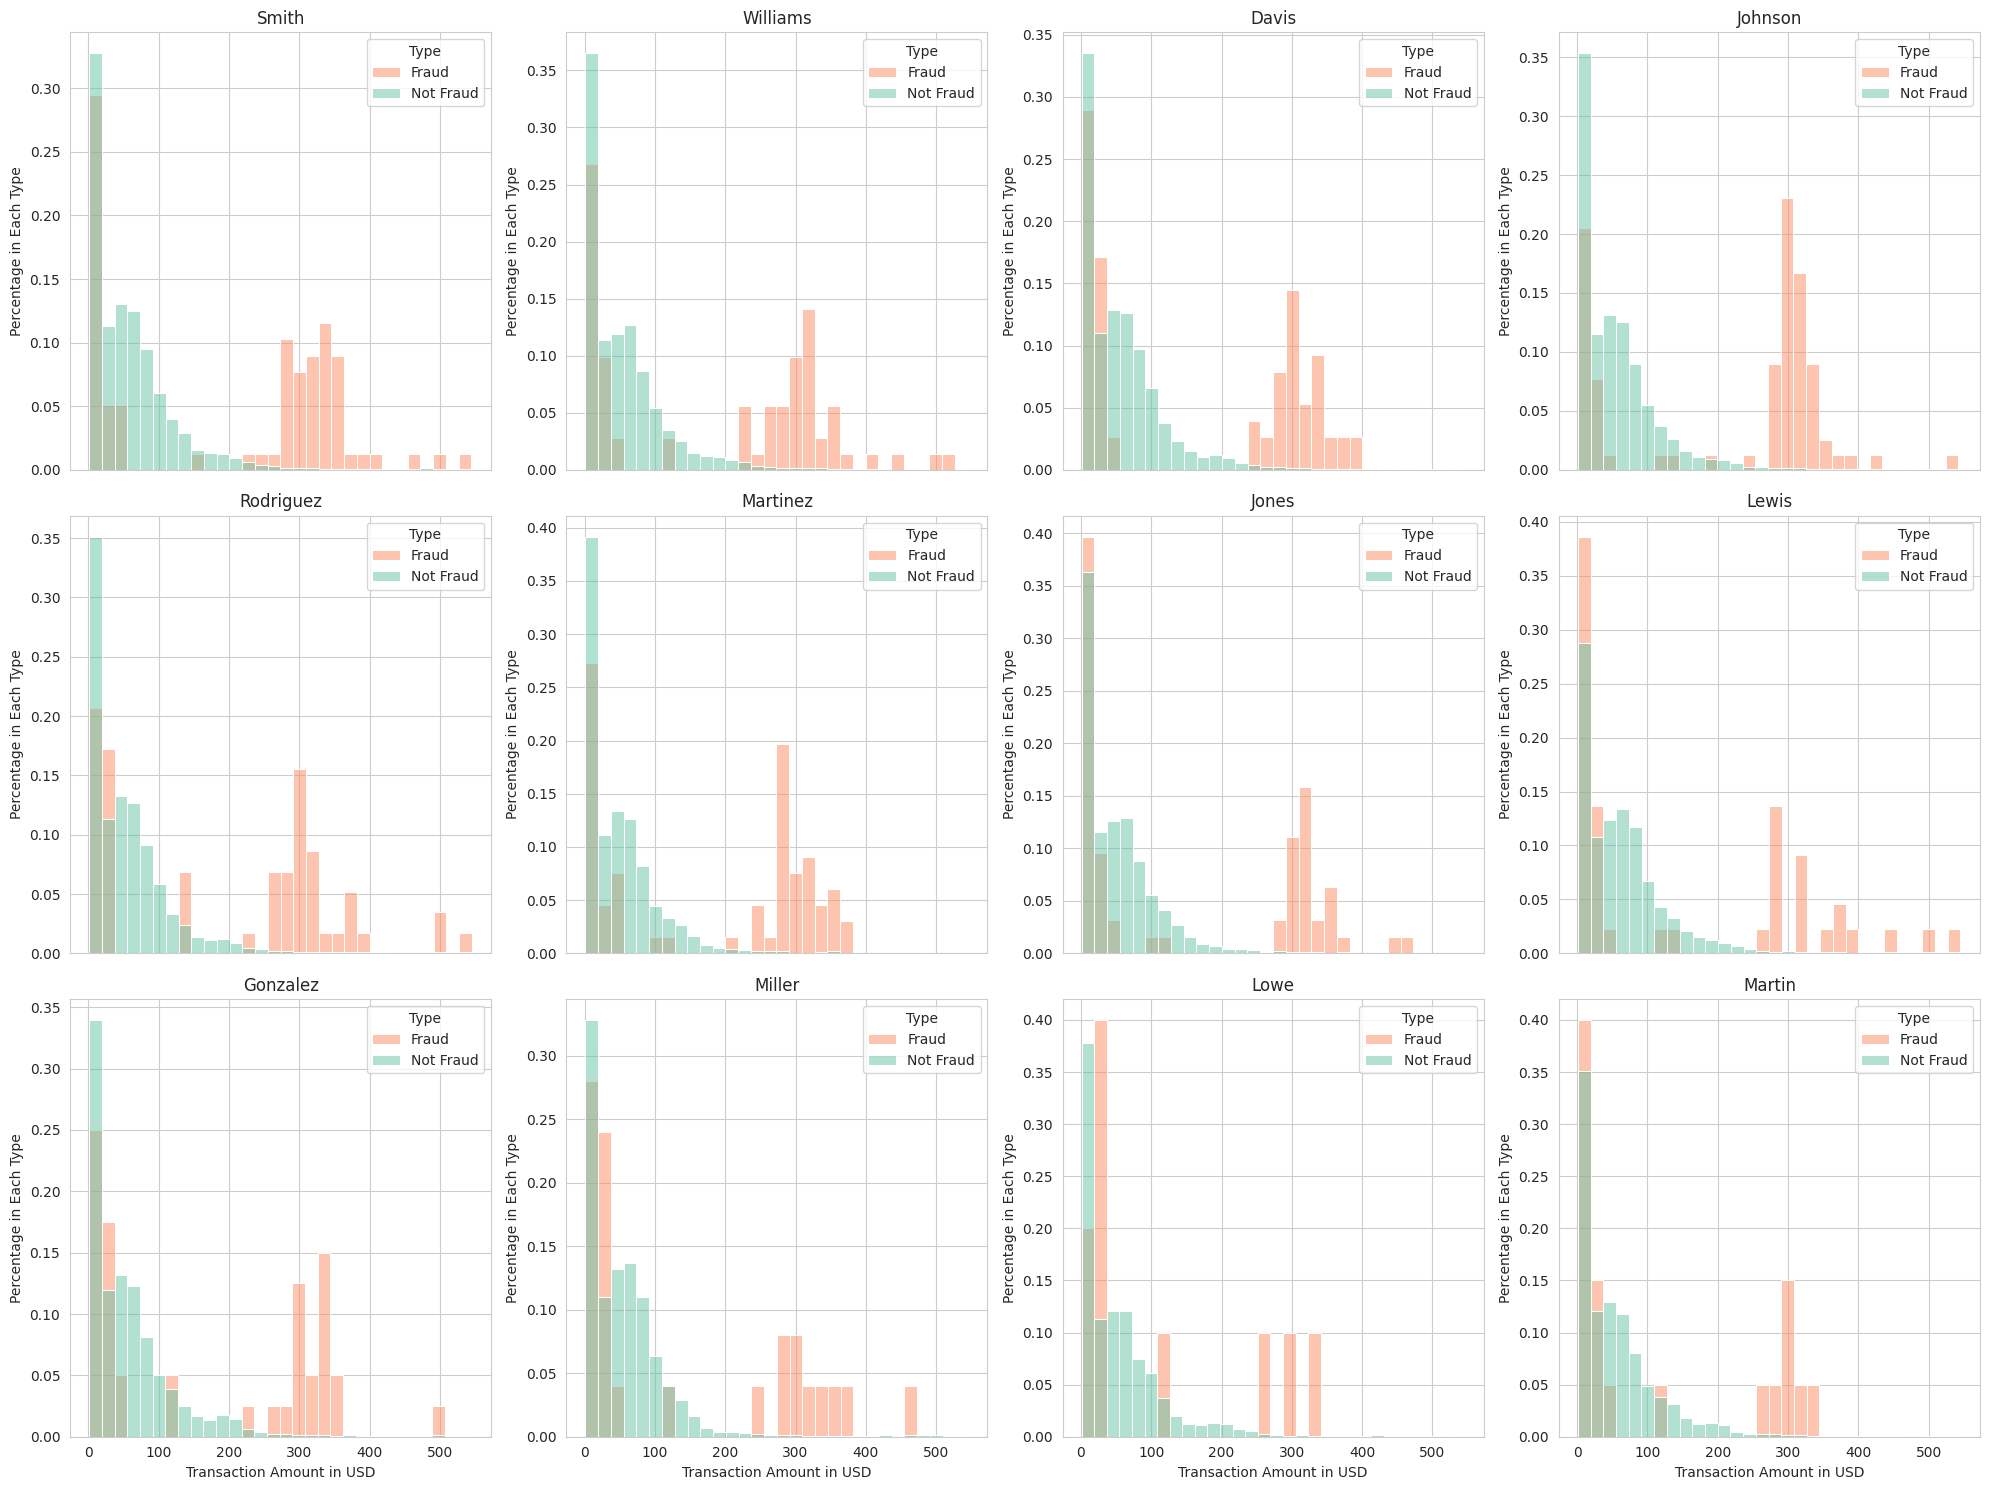

In [15]:
import math
lastnames = train['last'].value_counts().index[:12]

num_plots = len(lastnames)
num_rows = math.isqrt(num_plots)
num_cols = math.ceil(num_plots / num_rows)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(
    5*num_cols, 5*num_rows), sharex=True)



for ax, lastname in zip(axes.ravel(),lastnames):

    data_lastname = train[train['last'] == lastname]

    sns.histplot(x='amt', data=data_lastname[data_lastname['amt'] <= pct99],
                 hue='is_fraud', stat='probability',
                 common_norm=False, bins=30, ax=ax)

    ax.set_ylabel('Percentage in Each Type')
    ax.set_xlabel('Transaction Amount in USD')
    ax.set_title(f'{lastname}')
    ax.legend(title='Type', labels=['Fraud', 'Not Fraud'])

plt.tight_layout()
plt.show();

**There are patterns in lastnames as well hence we must consider Lastnames for modelling**

In [16]:
train["state"].value_counts().shape

(51,)

In [17]:
train.groupby("state")["is_fraud"].value_counts()

state  is_fraud
AK     0            2084
       1              36
AL     0           40774
       1             215
AR     0           30966
                   ...  
WI     1             163
WV     0           25545
       1             146
WY     0           19212
       1             110
Name: count, Length: 101, dtype: int64

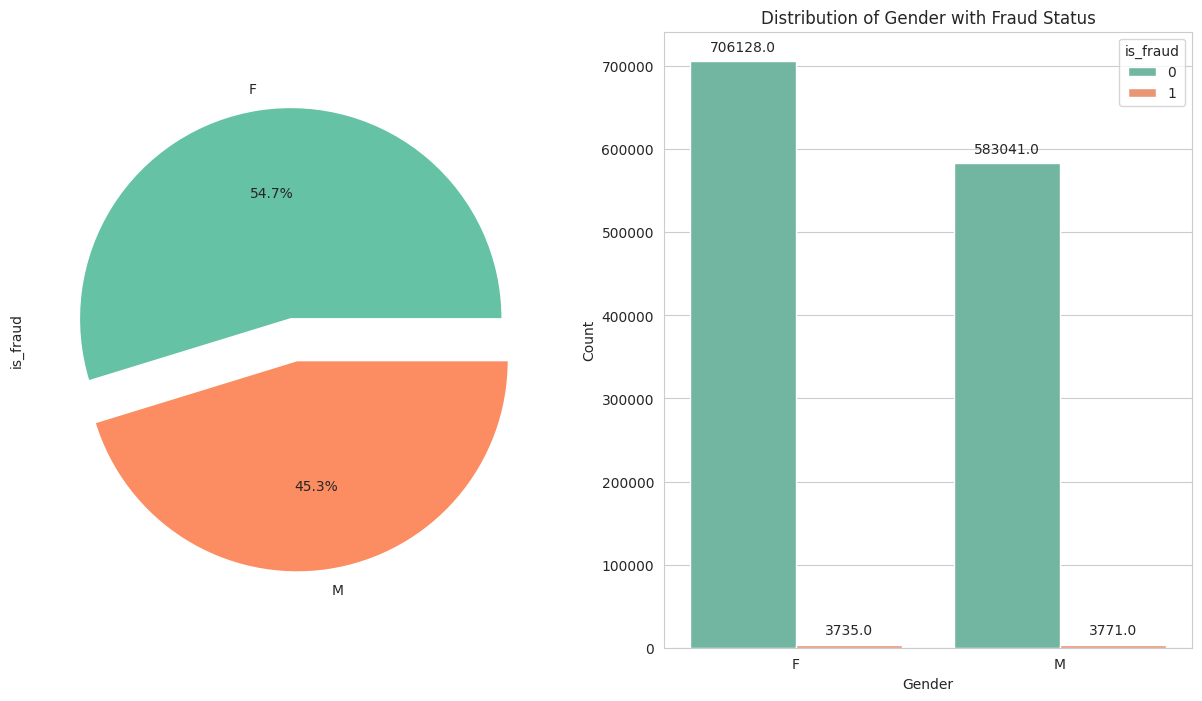

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(15, 8))

#Gender Distribution
explode = [0.1, 0.1]
train.groupby('gender')['is_fraud'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);

ax = sns.countplot(x="gender", hue="is_fraud", data=train,ax=axb[1])

# Add values on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set labels and title
plt.title("Distribution of Gender with Fraud Status")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

**Females are doing more transactions but males are more likely to make fraud transaction**

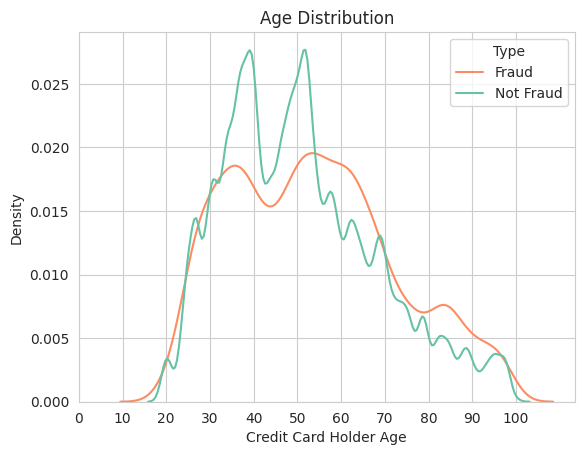

In [19]:
import datetime as dt

train['age'] = dt.date.today().year-pd.to_datetime(train['dob']).dt.year
test['age'] = dt.date.today().year-pd.to_datetime(test['dob']).dt.year

ax = sns.kdeplot(x='age', data=train, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0, 110, 10))
plt.title('Age Distribution')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud']);

**age has a less major impact on target**

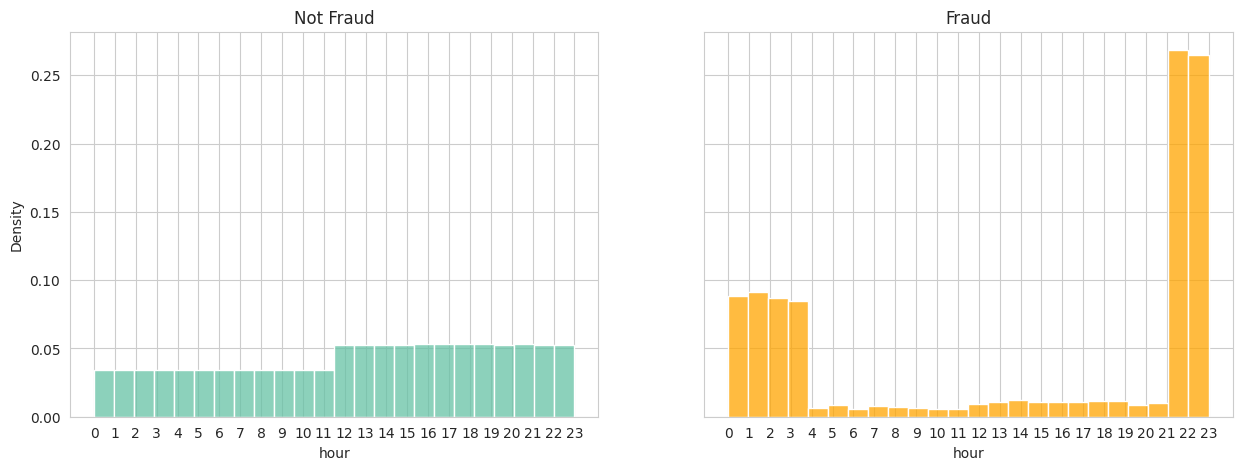

In [20]:
train['hour'] = pd.to_datetime(train['trans_date_trans_time']).dt.hour
test['hour'] = pd.to_datetime(test['trans_date_trans_time']).dt.hour

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)

ax1 = sns.histplot(x='hour', data=train[train["is_fraud"] == 0],
                   stat="density", bins=24, ax=ax1)

ax2 = sns.histplot(x='hour', data=train[train["is_fraud"] == 1],
                   stat="density", bins=24, ax=ax2, color="orange")

ax1.set_title("Not Fraud")
ax2.set_title("Fraud")

ax1.set_xticks(np.arange(24))
ax2.set_xticks(np.arange(24));

**It is clear that fraud transactions mainly occur at midnight.**

# **Preparing Data For Modelling**

In [21]:
train.dtypes

trans_date_trans_time     object
cc_num                     int64
category                  object
amt                      float64
last                      object
gender                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
merch_lat                float64
merch_long               float64
is_fraud                   int64
age                        int64
hour                       int32
dtype: object

In [22]:
train["gender"]= train["gender"].apply(lambda x: 1 if x == "M" else 0)
test["gender"]= test["gender"].apply(lambda x: 1 if x == "M" else 0)

In [23]:
import category_encoders as ce

def apply_woe(train, columns, target_col):
    woe = ce.WOEEncoder()

    for col in columns:
        X = train[col]
        y = train[target_col]

        new_col_name = f"{col}_WOE"
        train[new_col_name] = woe.fit_transform(X, y)

    return train


columns_to_encode = ["category", "state", "city", "job","last"]
target_column = "is_fraud"

train = apply_woe(train, columns_to_encode, target_column)
test = apply_woe(test, columns_to_encode, target_column)

In [24]:
col_drop = ["is_fraud","trans_date_trans_time","trans_num","dob","category", "state", "city", "job","last"]
X_train,X_test,y_train,y_test = train.drop(columns=col_drop),test.drop(columns=col_drop),train["is_fraud"],test["is_fraud"]

In [25]:
X_train.dtypes

cc_num            int64
amt             float64
gender            int64
zip               int64
lat             float64
long            float64
city_pop          int64
merch_lat       float64
merch_long      float64
age               int64
hour              int32
category_WOE    float64
state_WOE       float64
city_WOE        float64
job_WOE         float64
last_WOE        float64
dtype: object

In [26]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy=0.1, random_state=23)
# X_undersampled, y_undersampled = rus.fit_resample(X_train, y_train)
X_undersampled, y_undersampled = X_train, y_train

**Tried Undersampling but without Undersampling model has greater score so commented it**

In [27]:
# y_train.value_counts(),y_undersampled.value_counts()

(is_fraud
 0    1289169
 1       7506
 Name: count, dtype: int64,
 is_fraud
 0    1289169
 1       7506
 Name: count, dtype: int64)

**undersampled normal transactions from 12L to 75k**

In [28]:
X_undersampled.sample(2)

,cc_num,amt,gender,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,category_WOE,state_WOE,city_WOE,job_WOE,last_WOE
1237065,2720433095629877,8.40,1,4287,44.0575,-69.9656,3224,44.506876,-70.054361,27,12,-0.698428,0.229034,-0.057575,0.137932,0.072985
472681,370818583810103,41.08,1,15557,39.9373,-79.1865,3684,40.028753,-79.845042,48,11,-0.670421,-0.007292,0.321480,0.690428,0.069877


<Axes: >

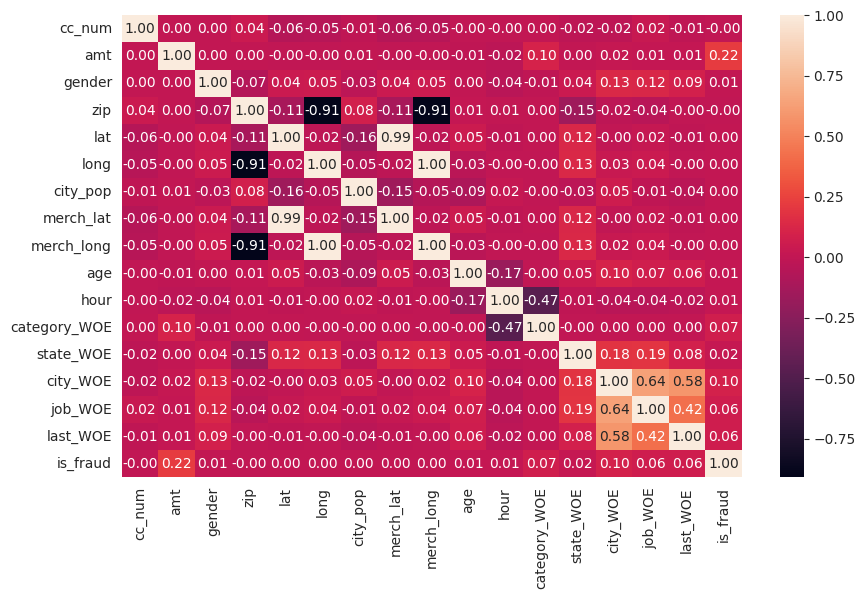

In [29]:
plt.figure(figsize=(10,6))
sns.heatmap(pd.concat([X_undersampled,y_undersampled],axis=1).corr(),annot=True,fmt='.2f')

**Amount has the highest corelation with fraud other columns have very negligible effect on fraud transaction**

In [30]:
# col_d = ["zip","lat","long","city_pop","merch_lat", "merch_long", "cc_num"]
col_d = []

X_train = X_undersampled.drop(columns=col_d)
X_test =  X_test.drop(columns=col_d)
y_train = y_undersampled

**Tried Dropping these columns but score is greater keeping these columns**

In [31]:
X_train.head(2)

,cc_num,amt,gender,zip,lat,long,city_pop,merch_lat,merch_long,age,hour,category_WOE,state_WOE,city_WOE,job_WOE,last_WOE
0,2703186189652095,4.97,0,28654,36.0788,-81.1781,3495,36.011293,-82.048315,36,0,0.924914,-0.156457,-2.469513,-1.080186,-2.469513
1,630423337322,107.23,0,99160,48.8878,-118.2105,149,49.159047,-118.186462,46,0,0.898799,-0.122657,-3.027790,-0.904144,-0.673638


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1296675, 16), (1296675,), (555719, 16), (555719,))

In [45]:
#classification report
from sklearn.metrics import classification_report,confusion_matrix,precision_score,accuracy_score

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
rf.score(X_test,y_test)

0.9989491091720816

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.96      0.76      0.85      2145

    accuracy                           1.00    555719
   macro avg       0.98      0.88      0.92    555719
weighted avg       1.00      1.00      1.00    555719



<Axes: >

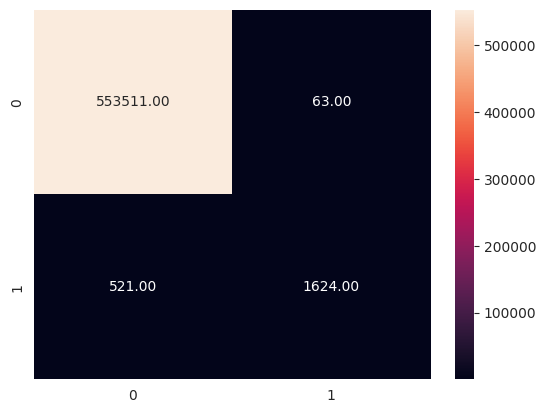

In [37]:
y_pred = rf.predict(X_test)
print(classification_report(y_test,y_pred))
cnf = confusion_matrix(y_test,y_pred)
sns.heatmap(cnf,annot=True,fmt=".2f")

**Feature Importance**

In [46]:
print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Precision: ", precision_score(y_test,y_pred))

Accuracy:  0.9989491091720816
Precision:  0.9626556016597511


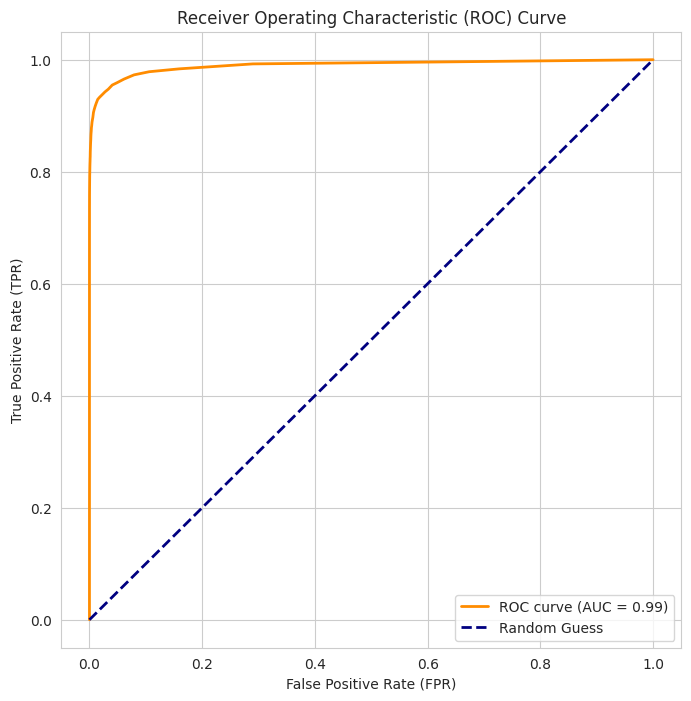

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
y_prob = rf.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve) score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

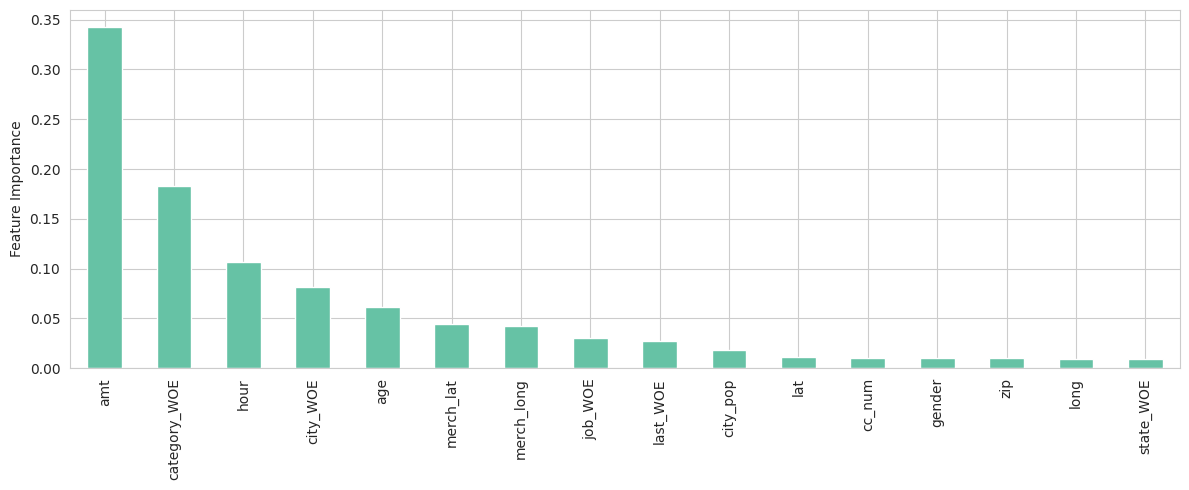

In [50]:
importances = rf.feature_importances_
forest_importances = pd.Series(importances,index=X_undersampled.columns)
fig, ax = plt.subplots(figsize=(12, 5))
forest_importances.sort_values(ascending=False).plot.bar(ax=ax)
ax.set_ylabel("Feature Importance")
fig.tight_layout();

# Conclusion

In this problem, it is crucial to look at precision score besides the accuracy score because of highly imbalanced dataset

Since our problem is related to fraud transactions, the model with low false negatives (transactions that are predicted as non-frauds and but actually are fraudulents) is better.

in this problem the precision and recall metric are the most important for the model.